<a href="https://colab.research.google.com/github/hari160389/foodhub/blob/master/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 63.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [5]:
print ("hello")

hello


## Loading the dataset

In [3]:
import pandas as pd

# Load the dataset using pandas
bank_df = pd.read_csv('Loan_Modelling.csv')

# Display the first few rows of the dataframe to verify
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [4]:
# Check for missing values
print("Missing Values:\n", bank_df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", bank_df.duplicated().sum())

# Check data types of each column
print("\nData Types:\n", bank_df.dtypes)

# Check for inconsistencies in categorical features
categorical_features = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for feature in categorical_features:
    print(f"\nUnique values in {feature}:", bank_df[feature].unique())

# Check the range of numerical features
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    print(f"\nRange of {feature}: ({bank_df[feature].min()}, {bank_df[feature].max()})")

# Check for any other obvious inconsistencies
# For example, check if Experience is always less than or equal to Age
print("\nInconsistencies in Experience and Age:", bank_df[bank_df['Experience'] > bank_df['Age']].shape[0])

Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Duplicate Rows: 0

Data Types:
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Unique values in Education: [1 2 3]

Unique values in Personal_Loan: [0 1]

Unique values in Securities_Account: [1 0]

Unique values in CD_Account: [0 1]

Unique val

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**1. Distribution of Mortgage**

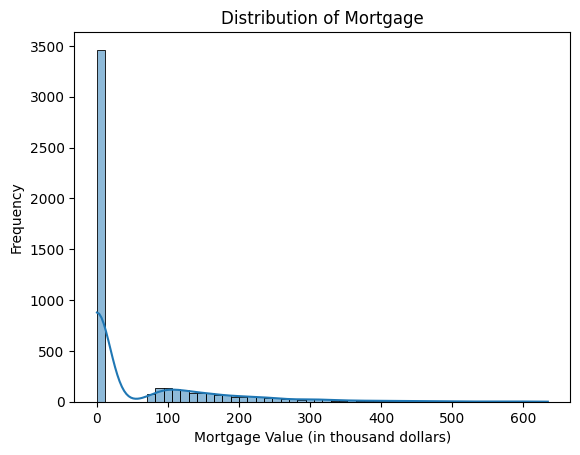

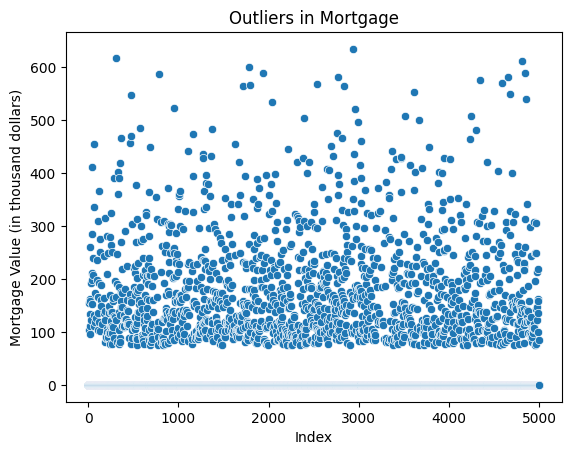

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Mortgage
sns.histplot(bank_df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Check for outliers using boxplot
sns.scatterplot(x=bank_df.index, y=bank_df['Mortgage'])
plt.title('Outliers in Mortgage')
plt.xlabel('Index')
plt.ylabel('Mortgage Value (in thousand dollars)')
plt.show()

**2. Number of customers with credit cards**

In [7]:
num_credit_card_customers = bank_df['CreditCard'].sum()
print("Number of customers with credit cards:", num_credit_card_customers)

Number of customers with credit cards: 1470


**3. Attributes with Strong Correlation to Personal Loan**

In [12]:
correlation_matrix = bank_df.corr()
personal_loan_correlation = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

print("Correlation with Personal Loan:")
for index, value in personal_loan_correlation.items():
    print(f"  {index:20}: {value:.6f}")

Correlation with Personal Loan:
  Personal_Loan       : 1.000000
  Income              : 0.502462
  CCAvg               : 0.366889
  CD_Account          : 0.316355
  Mortgage            : 0.142095
  Education           : 0.136722
  Family              : 0.061367
  Securities_Account  : 0.021954
  Online              : 0.006278
  CreditCard          : 0.002802
  ZIPCode             : -0.002974
  Experience          : -0.007413
  Age                 : -0.007726
  ID                  : -0.024801


**4. Customer's Interest in Purchasing a Loan by Age:**

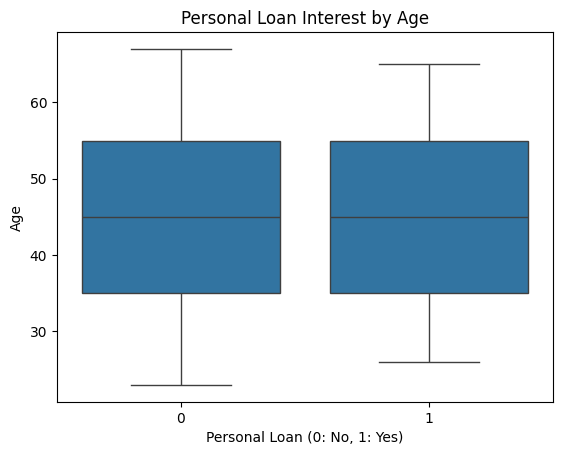

In [18]:
sns.boxplot(x='Personal_Loan', y='Age', data=bank_df)
plt.title('Personal Loan Interest by Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

**5. Customer's Interest in Purchasing a Loan by Education:**

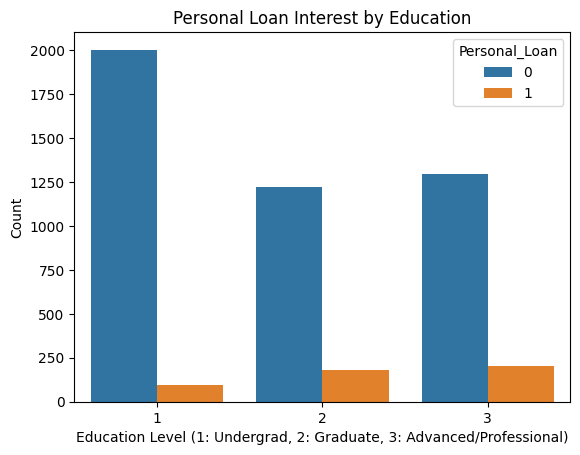

In [15]:
sns.countplot(x='Education', hue='Personal_Loan', data=bank_df)
plt.title('Personal Loan Interest by Education')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional)')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___